In [12]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from bs4 import BeautifulSoup # library for web scrapping  

#!conda install -c conda-forge geocoder --yes
import geocoder

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_08bb72f8b0e34f709049f924036cce67 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Pga1tgmylpGZFBLxqnCc_ZDQX0yEyGsvH4b-27Y8IrbL',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_08bb72f8b0e34f709049f924036cce67.get_object(Bucket='finalproject-donotdelete-pr-vfuvz2valplr2w',Key='london_crime_by_lsoa.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_0 = pd.read_csv(body)
df_data_0.head()
print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [13]:
CLIENT_ID = 'R01LINGO2WC45KLRLKT3ZHU2QENAO2IPRK2N2ELOHRNK4P3K' # your Foursquare ID
CLIENT_SECRET = '4JT1TWRMXMPLX5IOKNBAFU3L3ARXK4D5JJDPFK1CLRZM2ZVW' # your Foursquare Secret

VERSION = '20180604'
LIMIT = 30

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: R01LINGO2WC45KLRLKT3ZHU2QENAO2IPRK2N2ELOHRNK4P3K
CLIENT_SECRET:4JT1TWRMXMPLX5IOKNBAFU3L3ARXK4D5JJDPFK1CLRZM2ZVW


In [19]:

body = client_08bb72f8b0e34f709049f924036cce67.get_object(Bucket='finalproject-donotdelete-pr-vfuvz2valplr2w',Key='london_crime_by_lsoa.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df = pd.read_csv(body)
df.head()


,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [20]:
# Taking only the most recent year (2016) and dropping the rest
df.drop(df.index[df['year'] != 2016], inplace = True)

# Removing all the entires where crime values are null  
df = df[df.value != 0]

# Reset the index and dropping the previous index
df = df.reset_index(drop=True)

In [21]:
# Shape of the data frame
df.shape

(392042, 7)

In [22]:
# View the top of the dataset 
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
1,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
2,E01003989,Southwark,Theft and Handling,Theft From Shops,4,2016,8
3,E01002276,Havering,Burglary,Burglary in a Dwelling,1,2016,8
4,E01003674,Redbridge,Drugs,Possession Of Drugs,2,2016,11


In [23]:
df.columns = ['LSOA_Code', 'Borough','Major_Category','Minor_Category','No_of_Crimes','Year','Month']
df.head()

,LSOA_Code,Borough,Major_Category,Minor_Category,No_of_Crimes,Year,Month
0,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
1,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
2,E01003989,Southwark,Theft and Handling,Theft From Shops,4,2016,8
3,E01002276,Havering,Burglary,Burglary in a Dwelling,1,2016,8
4,E01003674,Redbridge,Drugs,Possession Of Drugs,2,2016,11


In [24]:
# View the information of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392042 entries, 0 to 392041
Data columns (total 7 columns):
LSOA_Code         392042 non-null object
Borough           392042 non-null object
Major_Category    392042 non-null object
Minor_Category    392042 non-null object
No_of_Crimes      392042 non-null int64
Year              392042 non-null int64
Month             392042 non-null int64
dtypes: int64(3), object(4)
memory usage: 20.9+ MB


In [25]:
df['Borough'].value_counts()

Lambeth                   17605
Southwark                 16560
Croydon                   16254
Newham                    15622
Ealing                    15284
Tower Hamlets             15219
Brent                     14980
Barnet                    14668
Hackney                   14392
Lewisham                  14235
Haringey                  14202
Enfield                   13658
Wandsworth                13498
Westminster               13383
Islington                 13116
Greenwich                 12750
Camden                    12632
Hillingdon                12417
Hounslow                  12316
Waltham Forest            12121
Bromley                   11980
Redbridge                 11490
Hammersmith and Fulham    10281
Barking and Dagenham       9784
Havering                   9699
Kensington and Chelsea     9653
Harrow                     8257
Bexley                     8245
Merton                     8223
Richmond upon Thames       7199
Sutton                     6823
Kingston

In [26]:
df['Major_Category'].value_counts()

Theft and Handling             129159
Violence Against the Person    123050
Criminal Damage                 48584
Burglary                        43020
Drugs                           21782
Robbery                         14889
Other Notifiable Offences       11558
Name: Major_Category, dtype: int64

In [27]:
London_crime = pd.pivot_table(df,values=['No_of_Crimes'],
                               index=['Borough'],
                               columns=['Major_Category'],
                               aggfunc=np.sum,fill_value=0)
London_crime.head()

No_of_Crimes                        \
Major_Category           Burglary Criminal Damage Drugs   
Borough                                                   
Barking and Dagenham         1287            1949   919   
Barnet                       3402            2183   906   
Bexley                       1123            1673   646   
Brent                        2631            2280  2096   
Bromley                      2214            2202   728   

                                                                           \
Major_Category       Other Notifiable Offences Robbery Theft and Handling   
Borough                                                                     
Barking and Dagenham                       378     534               5607   
Barnet                                     499     464               9731   
Bexley                                     294     209               4392   
Brent                                      536     919               9026   
Bromley                                    417     369               7584   

                                                  
Major_Category       Violence Against the Person  
Borough                                           
Barking and Dagenham                        6067  
Barnet                                      7499  
Bexley                                      4503  
Brent                                       9205  
Bromley                                     6650

In [28]:
# Reset the index
London_crime.reset_index(inplace = True)

In [29]:
London_crime['Total'] = London_crime.sum(axis=1)
London_crime.head(33)

Borough No_of_Crimes                        \
Major_Category                             Burglary Criminal Damage Drugs   
0                 Barking and Dagenham         1287            1949   919   
1                               Barnet         3402            2183   906   
2                               Bexley         1123            1673   646   
3                                Brent         2631            2280  2096   
4                              Bromley         2214            2202   728   
5                               Camden         2652            1935  1493   
6                       City of London            2               2    10   
7                              Croydon         2738            3219  1367   
8                               Ealing         2492            2562  1355   
9                              Enfield         2541            2136  1063   
10                           Greenwich         1780            2476   867   
11                             Hackney         2719            1981  1353   
12              Hammersmith and Fulham         1531            1408  1321   
13                            Haringey         2474            2233  1540   
14                              Harrow         1994            1212   473   
15                            Havering         1826            1804   718   
16                          Hillingdon         2229            2470  1042   
17                            Hounslow         1808            2213  1086   
18                           Islington         2051            1903  1777   
19              Kensington and Chelsea         1449            1051  1680   
20                Kingston upon Thames          879            1054   743   
21                             Lambeth         3087            2764  2738   
22                            Lewisham         2071            2351  1617   
23                              Merton         1419            1418   466   
24                              Newham         2115            2496  1684   
25                           Redbridge         1997            1650  1017   
26                Richmond upon Thames         1359            1148   320   
27                           Southwark         2946            2621  1838   
28                              Sutton         1233            1316   461   
29                       Tower Hamlets         2794            2357  1629   
30                      Waltham Forest         1873            1989  1042   
31                          Wandsworth         2351            1836   870   
32                         Westminster         3218            2179  2049   

                                                                     \
Major_Category Other Notifiable Offences Robbery Theft and Handling   
0                                    378     534               5607   
1                                    499     464               9731   
2                                    294     209               4392   
3                                    536     919               9026   
4                                    417     369               7584   
5                                    490     899              14088   
6                                      6       4                129   
7                                    718    1139               9229   
8                                    613     669              10040   
9                                    492     807               8037   
10                                   521     486               8010   
11                                   499    1030              11851   
12                                   474     397               8925   
13                                   551    1248              10554   
14                                   267     377               4537   
15                                   389     311               5919   
16                                  1305     420         

In [30]:
London_crime.columns = London_crime.columns.map(''.join)
London_crime.head()

,Borough,No_of_CrimesBurglary,No_of_CrimesCriminal Damage,No_of_CrimesDrugs,No_of_CrimesOther Notifiable Offences,No_of_CrimesRobbery,No_of_CrimesTheft and Handling,No_of_CrimesViolence Against the Person,Total
0,Barking and Dagenham,1287,1949,919,378,534,5607,6067,16741
1,Barnet,3402,2183,906,499,464,9731,7499,24684
2,Bexley,1123,1673,646,294,209,4392,4503,12840
3,Brent,2631,2280,2096,536,919,9026,9205,26693
4,Bromley,2214,2202,728,417,369,7584,6650,20164


In [31]:
London_crime.columns = ['Borough','Burglary', 'Criminal Damage','Drugs','Other Notifiable Offences',
                        'Robbery','Theft and Handling','Violence Against the Person','Total']
London_crime.head()

,Borough,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total
0,Barking and Dagenham,1287,1949,919,378,534,5607,6067,16741
1,Barnet,3402,2183,906,499,464,9731,7499,24684
2,Bexley,1123,1673,646,294,209,4392,4503,12840
3,Brent,2631,2280,2096,536,919,9026,9205,26693
4,Bromley,2214,2202,728,417,369,7584,6650,20164


In [32]:
# Shape of the data set 
London_crime.shape

(33, 9)

In [38]:
# getting data from internet
wikipedia_link='https://en.wikipedia.org/wiki/List_of_London_boroughs'
raw_wikipedia_page= requests.get(wikipedia_link).text

# using beautiful soup to parse the HTML/XML codes.
soup = BeautifulSoup(raw_wikipedia_page,'xml')
print(soup.prettify())

<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="UTF-8"/>
  <title>
   List of London boroughs - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"XqdCoApAML8AAhqU@jAAAAAE","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_London_boroughs","wgTitle":"List of London boroughs","wgCurRevisionId":953518321,"wgRevisionId":953518321,"wgArticleId":28092685,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from August 2015","Use British English from August 2015","Lists of coordinates"

In [74]:
import pandas as pd
import html5lib
url = 'https://en.wikipedia.org/wiki/List_of_London_boroughs'
London_table = pd.read_html(url)
London_table = pd.concat(dfs)
London_table.head()

,0,Area (sq mi),Borough,Co-ordinates,Headquarters,Inner,Local authority,Nr. in map,Nr. inmap,Political control,Population (2013 est)[1],Population(2011 est),Status,vteGovernance of Greater London,vteGovernance of Greater London.1
0,NaN,13.93,Barking and Dagenham [note 1],51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,"Town Hall, 1 Town Square",NaN,Barking and Dagenham London Borough Council,25.0,NaN,Labour,194352.0,NaN,NaN,NaN,NaN
1,NaN,33.49,Barnet,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,"Barnet House, 2 Bristol Avenue, Colindale",NaN,Barnet London Borough Council,31.0,NaN,Conservative,369088.0,NaN,NaN,NaN,NaN
2,NaN,23.38,Bexley,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,"Civic Offices, 2 Watling Street",NaN,Bexley London Borough Council,23.0,NaN,Conservative,236687.0,NaN,NaN,NaN,NaN
3,NaN,16.70,Brent,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,"Brent Civic Centre, Engineers Way",NaN,Brent London Borough Council,12.0,NaN,Labour,317264.0,NaN,NaN,NaN,NaN
4,NaN,57.97,Bromley,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,"Civic Centre, Stockwell Close",NaN,Bromley London Borough Council,20.0,NaN,Conservative,317899.0,NaN,NaN,NaN,NaN


In [78]:
# Read in the second table 
London_table1 = pd.read_html(url)
London_table1 = pd.concat(dfs)
London_table1.head()


# View the table
London_table1

,0,Area (sq mi),Borough,Co-ordinates,Headquarters,Inner,Local authority,Nr. in map,Nr. inmap,Political control,Population (2013 est)[1],Population(2011 est),Status,vteGovernance of Greater London,vteGovernance of Greater London.1
0,NaN,13.93,Barking and Dagenham [note 1],51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,"Town Hall, 1 Town Square",NaN,Barking and Dagenham London Borough Council,25.0,NaN,Labour,194352.0,NaN,NaN,NaN,NaN
1,NaN,33.49,Barnet,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,"Barnet House, 2 Bristol Avenue, Colindale",NaN,Barnet London Borough Council,31.0,NaN,Conservative,369088.0,NaN,NaN,NaN,NaN
2,NaN,23.38,Bexley,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,"Civic Offices, 2 Watling Street",NaN,Bexley London Borough Council,23.0,NaN,Conservative,236687.0,NaN,NaN,NaN,NaN
3,NaN,16.70,Brent,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,"Brent Civic Centre, Engineers Way",NaN,Brent London Borough Council,12.0,NaN,Labour,317264.0,NaN,NaN,NaN,NaN
4,NaN,57.97,Bromley,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,"Civic Centre, Stockwell Close",NaN,Bromley London Borough Council,20.0,NaN,Conservative,317899.0,NaN,NaN,NaN,NaN
5,NaN,8.40,Camden,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,"Camden Town Hall, Judd Street",NaN,Camden London Borough Council,11.0,NaN,Labour,229719.0,NaN,NaN,NaN,NaN
6,NaN,33.41,Croydon,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W,"Bernard Weatherill House, Mint Walk",NaN,Croydon London Borough Council,19.0,NaN,Labour,372752.0,NaN,NaN,NaN,NaN
7,NaN,21.44,Ealing,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W,"Perceval House, 14-16 Uxbridge Road",NaN,Ealing London Borough Council,13.0,NaN,Labour,342494.0,NaN,NaN,NaN,NaN
8,NaN,31.74,Enfield,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W,"Civic Centre, Silver Street",NaN,Enfield London Borough Council,30.0,NaN,Labour,320524.0,NaN,NaN,NaN,NaN
9,NaN,18.28,Greenwich [note 2],51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E,"Woolwich Town Hall, Wellington Street",[note 3],Greenwich London Borough Council,22.0,NaN,Labour,264008.0,NaN,Royal,NaN,NaN


In [79]:
London_table = London_table.append(London_table1, ignore_index = True) 
London_table.head()

,0,Area (sq mi),Borough,Co-ordinates,Headquarters,Inner,Local authority,Nr. in map,Nr. inmap,Political control,Population (2013 est)[1],Population(2011 est),Status,vteGovernance of Greater London,vteGovernance of Greater London.1
0,NaN,13.93,Barking and Dagenham [note 1],51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,"Town Hall, 1 Town Square",NaN,Barking and Dagenham London Borough Council,25.0,NaN,Labour,194352.0,NaN,NaN,NaN,NaN
1,NaN,33.49,Barnet,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,"Barnet House, 2 Bristol Avenue, Colindale",NaN,Barnet London Borough Council,31.0,NaN,Conservative,369088.0,NaN,NaN,NaN,NaN
2,NaN,23.38,Bexley,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,"Civic Offices, 2 Watling Street",NaN,Bexley London Borough Council,23.0,NaN,Conservative,236687.0,NaN,NaN,NaN,NaN
3,NaN,16.70,Brent,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,"Brent Civic Centre, Engineers Way",NaN,Brent London Borough Council,12.0,NaN,Labour,317264.0,NaN,NaN,NaN,NaN
4,NaN,57.97,Bromley,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,"Civic Centre, Stockwell Close",NaN,Bromley London Borough Council,20.0,NaN,Conservative,317899.0,NaN,NaN,NaN,NaN


In [80]:
London_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 15 columns):
0                                    4 non-null object
Area (sq mi)                         66 non-null float64
Borough                              66 non-null object
Co-ordinates                         66 non-null object
Headquarters                         66 non-null object
Inner                                8 non-null object
Local authority                      66 non-null object
Nr. in map                           64 non-null float64
Nr. inmap                            2 non-null float64
Political control                    66 non-null object
Population (2013 est)[1]             64 non-null float64
Population(2011 est)                 2 non-null float64
Status                               10 non-null object
vteGovernance of Greater London      10 non-null object
vteGovernance of Greater London.1    10 non-null object
dtypes: float64(5), object(10)
memory usage: 9.5+ KB


In [81]:

London_table = London_table.replace('note 1','', regex=True) 
London_table = London_table.replace('note 2','', regex=True) 
London_table = London_table.replace('note 3','', regex=True) 
London_table = London_table.replace('note 4','', regex=True) 
London_table = London_table.replace('note 5','', regex=True) 

# View the top of the data set
London_table.head()

,0,Area (sq mi),Borough,Co-ordinates,Headquarters,Inner,Local authority,Nr. in map,Nr. inmap,Political control,Population (2013 est)[1],Population(2011 est),Status,vteGovernance of Greater London,vteGovernance of Greater London.1
0,NaN,13.93,Barking and Dagenham [],51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,"Town Hall, 1 Town Square",NaN,Barking and Dagenham London Borough Council,25.0,NaN,Labour,194352.0,NaN,NaN,NaN,NaN
1,NaN,33.49,Barnet,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,"Barnet House, 2 Bristol Avenue, Colindale",NaN,Barnet London Borough Council,31.0,NaN,Conservative,369088.0,NaN,NaN,NaN,NaN
2,NaN,23.38,Bexley,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,"Civic Offices, 2 Watling Street",NaN,Bexley London Borough Council,23.0,NaN,Conservative,236687.0,NaN,NaN,NaN,NaN
3,NaN,16.70,Brent,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,"Brent Civic Centre, Engineers Way",NaN,Brent London Borough Council,12.0,NaN,Labour,317264.0,NaN,NaN,NaN,NaN
4,NaN,57.97,Bromley,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,"Civic Centre, Stockwell Close",NaN,Bromley London Borough Council,20.0,NaN,Conservative,317899.0,NaN,NaN,NaN,NaN


In [82]:

type(London_table)

pandas.core.frame.DataFrame

In [83]:
set(df.Borough) - set(London_table.Borough)

{'Barking and Dagenham [note 1]',
 'Greenwich [note 2]',
 'Hammersmith and Fulham [note 4]'}

In [84]:
print("The index of first borough is",London_table.index[London_table['Borough'] == 'Barking and Dagenham []'].tolist())
print("The index of second borough is",London_table.index[London_table['Borough'] == 'Greenwich []'].tolist())
print("The index of third borough is",London_table.index[London_table['Borough'] == 'Hammersmith and Fulham []'].tolist())

The index of first borough is [0, 40]
The index of second borough is [9, 49]
The index of third borough is [11, 51]


In [86]:
London_table.iloc[0,0] = 'Barking and Dagenham'
London_table.iloc[9,0] = 'Greenwich'
London_table.iloc[11,0] = 'Hammersmith and Fulham

In [87]:
set(df.Borough) - set(London_table.Borough)

{'Barking and Dagenham [note 1]',
 'Greenwich [note 2]',
 'Hammersmith and Fulham [note 4]'}

In [88]:
Ld_crime = pd.merge(London_crime, London_table, on='Borough')
Ld_crime.head(10)

,Borough,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total,0,...,Inner,Local authority,Nr. in map,Nr. inmap,Political control,Population (2013 est)[1],Population(2011 est),Status,vteGovernance of Greater London,vteGovernance of Greater London.1
0,Barnet,3402,2183,906,499,464,9731,7499,24684,NaN,...,NaN,Barnet London Borough Council,31.0,NaN,Conservative,369088.0,NaN,NaN,NaN,NaN
1,Barnet,3402,2183,906,499,464,9731,7499,24684,NaN,...,NaN,Barnet London Borough Council,31.0,NaN,Conservative,369088.0,NaN,NaN,NaN,NaN
2,Bexley,1123,1673,646,294,209,4392,4503,12840,NaN,...,NaN,Bexley London Borough Council,23.0,NaN,Conservative,236687.0,NaN,NaN,NaN,NaN
3,Bexley,1123,1673,646,294,209,4392,4503,12840,NaN,...,NaN,Bexley London Borough Council,23.0,NaN,Conservative,236687.0,NaN,NaN,NaN,NaN
4,Brent,2631,2280,2096,536,919,9026,9205,26693,NaN,...,NaN,Brent London Borough Council,12.0,NaN,Labour,317264.0,NaN,NaN,NaN,NaN
5,Brent,2631,2280,2096,536,919,9026,9205,26693,NaN,...,NaN,Brent London Borough Council,12.0,NaN,Labour,317264.0,NaN,NaN,NaN,NaN
6,Bromley,2214,2202,728,417,369,7584,6650,20164,NaN,...,NaN,Bromley London Borough Council,20.0,NaN,Conservative,317899.0,NaN,NaN,NaN,NaN
7,Bromley,2214,2202,728,417,369,7584,6650,20164,NaN,...,NaN,Bromley London Borough Council,20.0,NaN,Conservative,317899.0,NaN,NaN,NaN,NaN
8,Camden,2652,1935,1493,490,899,14088,7626,29183,NaN,...,NaN,Camden London Borough Council,11.0,NaN,Labour,229719.0,NaN,NaN,NaN,NaN
9,Camden,2652,1935,1493,490,899,14088,7626,29183,NaN,...,NaN,Camden London Borough Council,11.0,NaN,Labour,229719.0,NaN,NaN,NaN,NaN


In [89]:
# List of Column names of the data frame 
list(Ld_crime)

['Borough',
 'Burglary',
 'Criminal Damage',
 'Drugs',
 'Other Notifiable Offences',
 'Robbery',
 'Theft and Handling',
 'Violence Against the Person',
 'Total',
 0,
 'Area (sq mi)',
 'Co-ordinates',
 'Headquarters',
 'Inner',
 'Local authority',
 'Nr. in map',
 'Nr. inmap',
 'Political control',
 'Population (2013 est)[1]',
 'Population(2011 est)',
 'Status',
 'vteGovernance of Greater London',
 'vteGovernance of Greater London.1']

In [90]:
columnsTitles = ['Borough','Local authority','Political control','Headquarters',
                 'Area (sq mi)','Population (2013 est)[1]',
                 'Inner','Status',
                 'Burglary','Criminal Damage','Drugs','Other Notifiable Offences',
                 'Robbery','Theft and Handling','Violence Against the Person','Total','Co-ordinates']

Ld_crime = Ld_crime.reindex(columns=columnsTitles)

Ld_crime = Ld_crime[['Borough','Local authority','Political control','Headquarters',
                 'Area (sq mi)','Population (2013 est)[1]','Co-ordinates',
                 'Burglary','Criminal Damage','Drugs','Other Notifiable Offences',
                 'Robbery','Theft and Handling','Violence Against the Person','Total']]

Ld_crime.head()

,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total
0,Barnet,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088.0,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,3402,2183,906,499,464,9731,7499,24684
1,Barnet,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088.0,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,3402,2183,906,499,464,9731,7499,24684
2,Bexley,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687.0,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,1123,1673,646,294,209,4392,4503,12840
3,Bexley,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687.0,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,1123,1673,646,294,209,4392,4503,12840
4,Brent,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264.0,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,2631,2280,2096,536,919,9026,9205,26693


In [91]:
London_crime.describe()

,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,2069.242424,1941.545455,1179.212121,479.060606,682.666667,8913.121212,7041.848485,22306.696970
std,737.448644,625.207070,586.406416,223.298698,441.425366,4620.565054,2513.601551,8828.228749
min,2.000000,2.000000,10.000000,6.000000,4.000000,129.000000,25.000000,178.000000
25%,1531.000000,1650.000000,743.000000,378.000000,377.000000,5919.000000,5936.000000,16903.000000
50%,2071.000000,1989.000000,1063.000000,490.000000,599.000000,8925.000000,7409.000000,22730.000000
75%,2631.000000,2351.000000,1617.000000,551.000000,936.000000,10789.000000,8832.000000,27174.000000
max,3402.000000,3219.000000,2738.000000,1305.000000,1822.000000,27520.000000,10834.000000,48330.000000


In [92]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

Matplotlib version:  3.0.2


In [93]:
Ld_crime.columns = list(map(str, Ld_crime.columns))

# let's check the column labels types now
all(isinstance(column, str) for column in Ld_crime.columns)

True

In [94]:

Ld_crime.sort_values(['Total'], ascending = False, axis = 0, inplace = True )

df_top5 = Ld_crime.head() 
df_top5

,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total
59,Westminster,Westminster City Council,Conservative,"Westminster City Hall, 64 Victoria Street",8.29,226841.0,51°29′50″N 0°08′14″W﻿ / ﻿51.4973°N 0.1372°W,3218,2179,2049,708,1822,27520,10834,48330
58,Westminster,Westminster City Council,Conservative,"Westminster City Hall, 64 Victoria Street",8.29,226841.0,51°29′50″N 0°08′14″W﻿ / ﻿51.4973°N 0.1372°W,3218,2179,2049,708,1822,27520,10834,48330
36,Lambeth,Lambeth London Borough Council,Labour,"Lambeth Town Hall, Brixton Hill",10.36,314242.0,51°27′39″N 0°06′59″W﻿ / ﻿51.4607°N 0.1163°W,3087,2764,2738,635,1196,13155,10496,34071
37,Lambeth,Lambeth London Borough Council,Labour,"Lambeth Town Hall, Brixton Hill",10.36,314242.0,51°27′39″N 0°06′59″W﻿ / ﻿51.4607°N 0.1163°W,3087,2764,2738,635,1196,13155,10496,34071
49,Southwark,Southwark London Borough Council,Labour,160 Tooley Street,11.14,298464.0,51°30′13″N 0°04′49″W﻿ / ﻿51.5035°N 0.0804°W,2946,2621,1838,494,1317,12946,9474,31636


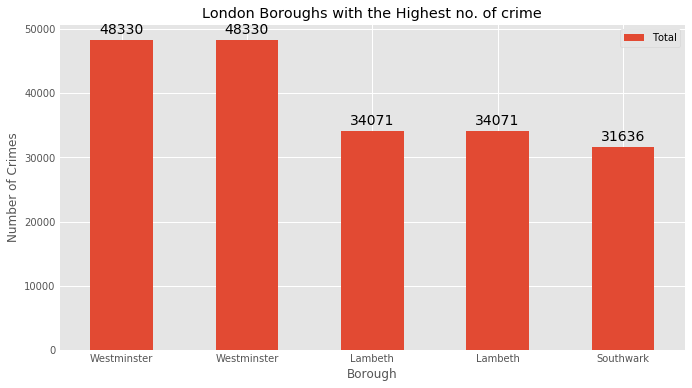

In [95]:

df_tt = df_top5[['Borough','Total']]

df_tt.set_index('Borough',inplace = True)

ax = df_tt.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Borough') # add y-label to the plot
ax.set_title('London Boroughs with the Highest no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()


In [96]:
Ld_crime.sort_values(['Total'], ascending = True, axis = 0, inplace = True )

df_bot5 = Ld_crime.head() 
df_bot5

,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total
11,City of London,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,NaN,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,2,2,10,6,4,129,25,178
10,City of London,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,NaN,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,2,2,10,6,4,129,25,178
35,Kingston upon Thames,Kingston upon Thames London Borough Council,Liberal Democrat,"Guildhall, High Street",14.38,166793.0,51°24′31″N 0°18′23″W﻿ / ﻿51.4085°N 0.3064°W,879,1054,743,189,121,3803,3194,9983
34,Kingston upon Thames,Kingston upon Thames London Borough Council,Liberal Democrat,"Guildhall, High Street",14.38,166793.0,51°24′31″N 0°18′23″W﻿ / ﻿51.4085°N 0.3064°W,879,1054,743,189,121,3803,3194,9983
51,Sutton,Sutton London Borough Council,Liberal Democrat,"Civic Offices, St Nicholas Way",16.93,195914.0,51°21′42″N 0°11′40″W﻿ / ﻿51.3618°N 0.1945°W,1233,1316,461,253,165,3516,3714,10658


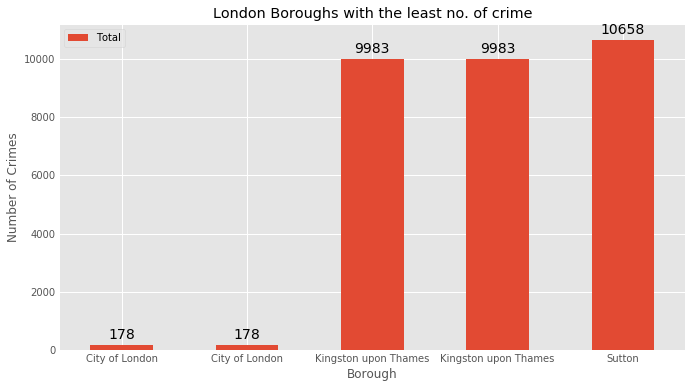

In [97]:
df_bt = df_bot5[['Borough','Total']]

df_bt.set_index('Borough',inplace = True)

ax = df_bt.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Borough') # add y-label to the plot
ax.set_title('London Boroughs with the least no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

In [98]:

df_col = df_bot5[df_bot5['Borough'] == 'City of London']
df_col = df_col[['Borough','Total','Area (sq mi)','Population (2013 est)[1]']]
df_col

,Borough,Total,Area (sq mi),Population (2013 est)[1]
11,City of London,178,1.12,NaN
10,City of London,178,1.12,NaN


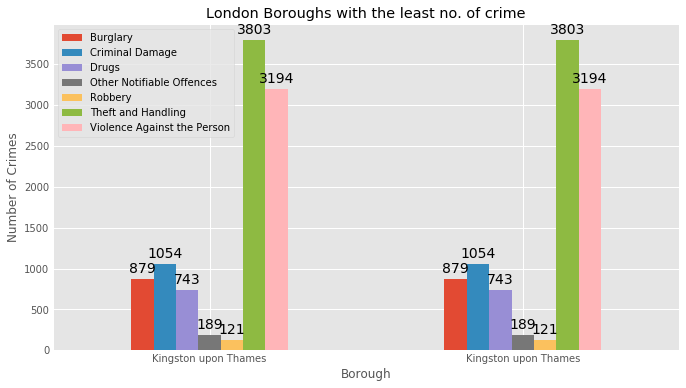

In [99]:
df_bc1 =  df_bot5[df_bot5['Borough'] == 'Kingston upon Thames']

df_bc = df_bc1[['Borough','Burglary','Criminal Damage','Drugs','Other Notifiable Offences',
                 'Robbery','Theft and Handling','Violence Against the Person']]


df_bc.set_index('Borough',inplace = True)

ax = df_bc.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Borough') # add y-label to the plot
ax.set_title('London Boroughs with the least no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

In [100]:
Neighborhood = ['Berrylands','Canbury','Chessington','Coombe','Hook','Kingston upon Thames',
'Kingston Vale','Malden Rushett','Motspur Park','New Malden','Norbiton',
'Old Malden','Seething Wells','Surbiton','Tolworth']

Borough = ['Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames',
          'Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames',
          'Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames',
          'Kingston upon Thames','Kingston upon Thames','Kingston upon Thames']

Latitude = ['','','','','','','','','','','','','','','']
Longitude = ['','','','','','','','','','','','','','','']

df_neigh = {'Neighborhood': Neighborhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
kut_neig = pd.DataFrame(data=df_neigh, columns=['Neighborhood', 'Borough', 'Latitude', 'Longitude'], index=None)

kut_neig

,Neighborhood,Borough,Latitude,Longitude
0,Berrylands,Kingston upon Thames,,
1,Canbury,Kingston upon Thames,,
2,Chessington,Kingston upon Thames,,
3,Coombe,Kingston upon Thames,,
4,Hook,Kingston upon Thames,,
5,Kingston upon Thames,Kingston upon Thames,,
6,Kingston Vale,Kingston upon Thames,,
7,Malden Rushett,Kingston upon Thames,,
8,Motspur Park,Kingston upon Thames,,
9,New Malden,Kingston upon Thames,,


In [101]:
Latitude = []
Longitude = []

for i in range(len(Neighborhood)):
    address = '{},London,United Kingdom'.format(Neighborhood[i])
    geolocator = Nominatim(user_agent="London_agent")
    location = geolocator.geocode(address)
    Latitude.append(location.latitude)
    Longitude.append(location.longitude)
print(Latitude, Longitude)

[51.3937811, 51.41749865, 51.358336, 51.4194499, 51.3678984, 51.4096275, 51.43185, 51.3410523, 51.3909852, 51.4053347, 51.4099994, 51.382484, 51.3926421, 51.3937557, 51.3788758] [-0.2848024, -0.30555280504926163, -0.2986216, -0.2653985, -0.3071453, -0.3062621, -0.2581379, -0.3190757, -0.2488979, -0.2634066, -0.2873963, -0.2590897, -0.3143662, -0.3033105, -0.2828604]


In [102]:
df_neigh = {'Neighborhood': Neighborhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
kut_neig = pd.DataFrame(data=df_neigh, columns=['Neighborhood', 'Borough', 'Latitude', 'Longitude'], index=None)

kut_neig

,Neighborhood,Borough,Latitude,Longitude
0,Berrylands,Kingston upon Thames,51.393781,-0.284802
1,Canbury,Kingston upon Thames,51.417499,-0.305553
2,Chessington,Kingston upon Thames,51.358336,-0.298622
3,Coombe,Kingston upon Thames,51.419450,-0.265398
4,Hook,Kingston upon Thames,51.367898,-0.307145
5,Kingston upon Thames,Kingston upon Thames,51.409627,-0.306262
6,Kingston Vale,Kingston upon Thames,51.431850,-0.258138
7,Malden Rushett,Kingston upon Thames,51.341052,-0.319076
8,Motspur Park,Kingston upon Thames,51.390985,-0.248898
9,New Malden,Kingston upon Thames,51.405335,-0.263407


In [103]:
address = 'Berrylands, London, United Kingdom'

geolocator = Nominatim(user_agent="ld_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Berrylands, London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Berrylands, London are 51.3937811, -0.2848024.


In [104]:
map_lon = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(kut_neig['Latitude'], kut_neig['Longitude'], kut_neig['Borough'], kut_neig['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lon)  
    
map_lon

In [105]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [107]:
kut_venues = getNearbyVenues(names=kut_neig['Neighborhood'],
                                   latitudes=kut_neig['Latitude'],
                                   longitudes=kut_neig['Longitude']
                                  )

Berrylands
Canbury
Chessington
Coombe
Hook
Kingston upon Thames
Kingston Vale
Malden Rushett
Motspur Park
New Malden
Norbiton
Old Malden
Seething Wells
Surbiton
Tolworth


In [108]:
print(kut_venues.shape)
kut_venues.head()

(171, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Berrylands,51.393781,-0.284802,Surbiton Racket & Fitness Club,51.392676,-0.290224,Gym / Fitness Center
1,Berrylands,51.393781,-0.284802,Alexandra Park,51.394230,-0.281206,Park
2,Berrylands,51.393781,-0.284802,K2 Bus Stop,51.392302,-0.281534,Bus Stop
3,Canbury,51.417499,-0.305553,Canbury Gardens,51.417409,-0.305300,Park
4,Canbury,51.417499,-0.305553,The Boater's Inn,51.418546,-0.305915,Pub


In [109]:
kut_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berrylands,3,3,3,3,3,3
Canbury,14,14,14,14,14,14
Hook,4,4,4,4,4,4
Kingston Vale,4,4,4,4,4,4
Kingston upon Thames,30,30,30,30,30,30
Malden Rushett,4,4,4,4,4,4
Motspur Park,5,5,5,5,5,5
New Malden,8,8,8,8,8,8
Norbiton,27,27,27,27,27,27


In [110]:
print('There are {} uniques categories.'.format(len(kut_venues['Venue Category'].unique())))

There are 66 uniques categories.


In [111]:
# one hot encoding
kut_onehot = pd.get_dummies(kut_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
kut_onehot['Neighborhood'] = kut_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [kut_onehot.columns[-1]] + list(kut_onehot.columns[:-1])
kut_onehot = kut_onehot[fixed_columns]

kut_onehot.head()

,Neighborhood,Asian Restaurant,Athletics & Sports,Auto Garage,Bakery,Bar,Beer Bar,Bistro,Bowling Alley,Breakfast Spot,...,Seafood Restaurant,Shop & Service,Soccer Field,Spa,Supermarket,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Train Station
0,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Canbury,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Canbury,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
kut_grouped = kut_onehot.groupby('Neighborhood').mean().reset_index()
kut_grouped

,Neighborhood,Asian Restaurant,Athletics & Sports,Auto Garage,Bakery,Bar,Beer Bar,Bistro,Bowling Alley,Breakfast Spot,...,Seafood Restaurant,Shop & Service,Soccer Field,Spa,Supermarket,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Train Station
0,Berrylands,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Canbury,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.071429,0.000000,0.071429,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000
2,Hook,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Kingston Vale,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Kingston upon Thames,0.033333,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.033333,0.066667,0.000000,0.033333,0.033333,0.000000
5,Malden Rushett,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Motspur Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,New Malden,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.125000,0.125000,0.000000,0.000000,0.000000,0.000000
8,Norbiton,0.000000,0.037037,0.037037,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,...,0.037037,0.000000,0.000000,0.037037,0.037037,0.000000,0.000000,0.037037,0.000000,0.000000
9,Old Malden,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333


In [113]:
num_top_venues = 5

for hood in kut_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = kut_grouped[kut_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berrylands----
                  venue  freq
0  Gym / Fitness Center  0.33
1                  Park  0.33
2              Bus Stop  0.33
3    Mexican Restaurant  0.00
4              Platform  0.00


----Canbury----
                  venue  freq
0                   Pub  0.29
1                 Plaza  0.07
2                 Hotel  0.07
3     Indian Restaurant  0.07
4  Gym / Fitness Center  0.07


----Hook----
               venue  freq
0             Bakery  0.25
1  Indian Restaurant  0.25
2        Supermarket  0.25
3  Fish & Chips Shop  0.25
4   Asian Restaurant  0.00


----Kingston Vale----
               venue  freq
0       Soccer Field  0.25
1      Grocery Store  0.25
2                Bar  0.25
3     Sandwich Place  0.25
4  Korean Restaurant  0.00


----Kingston upon Thames----
              venue  freq
0       Coffee Shop  0.10
1              Café  0.10
2               Pub  0.07
3  Sushi Restaurant  0.07
4      Burger Joint  0.07


----Malden Rushett----
              venue  freq
0 

In [114]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [115]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = kut_grouped['Neighborhood']

for ind in np.arange(kut_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(kut_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,Gym / Fitness Center,Park,Bus Stop,Train Station,Fish & Chips Shop,Discount Store,Electronics Store,Farmers Market,Fast Food Restaurant,Food
1,Canbury,Pub,Park,Fish & Chips Shop,Supermarket,Spa,Shop & Service,Gym / Fitness Center,Café,Plaza,Hotel
2,Hook,Indian Restaurant,Bakery,Supermarket,Fish & Chips Shop,Food,Department Store,Discount Store,Electronics Store,Farmers Market,Fast Food Restaurant
3,Kingston Vale,Grocery Store,Sandwich Place,Bar,Soccer Field,Department Store,Discount Store,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop
4,Kingston upon Thames,Coffee Shop,Café,Burger Joint,Sushi Restaurant,Pub,Asian Restaurant,French Restaurant,German Restaurant,Theater,Electronics Store


In [116]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

kut_grouped_clustering = kut_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kut_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([4, 2, 3, 1, 2, 1, 4, 2, 2, 0], dtype=int32)

In [117]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

kut_merged = kut_neig

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
kut_merged = kut_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

kut_merged.head() # check the last columns!

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,Kingston upon Thames,51.393781,-0.284802,4.0,Gym / Fitness Center,Park,Bus Stop,Train Station,Fish & Chips Shop,Discount Store,Electronics Store,Farmers Market,Fast Food Restaurant,Food
1,Canbury,Kingston upon Thames,51.417499,-0.305553,2.0,Pub,Park,Fish & Chips Shop,Supermarket,Spa,Shop & Service,Gym / Fitness Center,Café,Plaza,Hotel
2,Chessington,Kingston upon Thames,51.358336,-0.298622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Coombe,Kingston upon Thames,51.419450,-0.265398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hook,Kingston upon Thames,51.367898,-0.307145,3.0,Indian Restaurant,Bakery,Supermarket,Fish & Chips Shop,Food,Department Store,Discount Store,Electronics Store,Farmers Market,Fast Food Restaurant


In [119]:
kut_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 15 columns):
Neighborhood              15 non-null object
Borough                   15 non-null object
Latitude                  15 non-null float64
Longitude                 15 non-null float64
Cluster Labels            13 non-null float64
1st Most Common Venue     13 non-null object
2nd Most Common Venue     13 non-null object
3rd Most Common Venue     13 non-null object
4th Most Common Venue     13 non-null object
5th Most Common Venue     13 non-null object
6th Most Common Venue     13 non-null object
7th Most Common Venue     13 non-null object
8th Most Common Venue     13 non-null object
9th Most Common Venue     13 non-null object
10th Most Common Venue    13 non-null object
dtypes: float64(3), object(12)
memory usage: 1.8+ KB


In [122]:
# Dropping the row with the NaN value 
kut_merged.dropna(inplace = True)

In [123]:
kut_merged['Cluster Labels'] = kut_merged['Cluster Labels'].astype(int)

In [124]:

kut_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 14
Data columns (total 15 columns):
Neighborhood              13 non-null object
Borough                   13 non-null object
Latitude                  13 non-null float64
Longitude                 13 non-null float64
Cluster Labels            13 non-null int64
1st Most Common Venue     13 non-null object
2nd Most Common Venue     13 non-null object
3rd Most Common Venue     13 non-null object
4th Most Common Venue     13 non-null object
5th Most Common Venue     13 non-null object
6th Most Common Venue     13 non-null object
7th Most Common Venue     13 non-null object
8th Most Common Venue     13 non-null object
9th Most Common Venue     13 non-null object
10th Most Common Venue    13 non-null object
dtypes: float64(2), int64(1), object(12)
memory usage: 1.6+ KB


In [125]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kut_merged['Latitude'], kut_merged['Longitude'], kut_merged['Neighborhood'], kut_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

In [126]:
kut_merged[kut_merged['Cluster Labels'] == 0]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Old Malden,Kingston upon Thames,51.382484,-0.25909,0,Train Station,Pub,Food,Fast Food Restaurant,Deli / Bodega,Department Store,Discount Store,Electronics Store,Farmers Market,Fish & Chips Shop


In [127]:
kut_merged[kut_merged['Cluster Labels'] == 1]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Kingston Vale,Kingston upon Thames,51.431850,-0.258138,1,Grocery Store,Sandwich Place,Bar,Soccer Field,Department Store,Discount Store,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop
7,Malden Rushett,Kingston upon Thames,51.341052,-0.319076,1,Grocery Store,Garden Center,Pub,Restaurant,Farmers Market,Deli / Bodega,Department Store,Discount Store,Electronics Store,Fast Food Restaurant
14,Tolworth,Kingston upon Thames,51.378876,-0.282860,1,Grocery Store,Pharmacy,Pizza Place,Bowling Alley,Bus Stop,Café,Coffee Shop,Discount Store,Furniture / Home Store,Hotel


In [128]:
kut_merged[kut_merged['Cluster Labels'] == 2]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Canbury,Kingston upon Thames,51.417499,-0.305553,2,Pub,Park,Fish & Chips Shop,Supermarket,Spa,Shop & Service,Gym / Fitness Center,Café,Plaza,Hotel
5,Kingston upon Thames,Kingston upon Thames,51.409627,-0.306262,2,Coffee Shop,Café,Burger Joint,Sushi Restaurant,Pub,Asian Restaurant,French Restaurant,German Restaurant,Theater,Electronics Store
9,New Malden,Kingston upon Thames,51.405335,-0.263407,2,Gym,Sushi Restaurant,Supermarket,Gastropub,Bar,Chinese Restaurant,Korean Restaurant,Indian Restaurant,Train Station,Farmers Market
10,Norbiton,Kingston upon Thames,51.409999,-0.287396,2,Indian Restaurant,Pub,Italian Restaurant,Food,Platform,Grocery Store,Farmers Market,Hardware Store,Hotel,Japanese Restaurant
12,Seething Wells,Kingston upon Thames,51.392642,-0.314366,2,Indian Restaurant,Pub,Café,Coffee Shop,Restaurant,Fast Food Restaurant,Italian Restaurant,Hotel,Harbor / Marina,Gym / Fitness Center
13,Surbiton,Kingston upon Thames,51.393756,-0.303310,2,Coffee Shop,Pub,Grocery Store,Pharmacy,Italian Restaurant,Bakery,Bar,Bistro,Breakfast Spot,Deli / Bodega


In [129]:
kut_merged[kut_merged['Cluster Labels'] == 3]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Hook,Kingston upon Thames,51.367898,-0.307145,3,Indian Restaurant,Bakery,Supermarket,Fish & Chips Shop,Food,Department Store,Discount Store,Electronics Store,Farmers Market,Fast Food Restaurant


In [131]:
kut_merged[kut_merged['Cluster Labels'] == 4]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,Kingston upon Thames,51.393781,-0.284802,4,Gym / Fitness Center,Park,Bus Stop,Train Station,Fish & Chips Shop,Discount Store,Electronics Store,Farmers Market,Fast Food Restaurant,Food
8,Motspur Park,Kingston upon Thames,51.390985,-0.248898,4,Restaurant,Park,Gym,Soccer Field,Bus Stop,Train Station,Department Store,Discount Store,Electronics Store,Farmers Market
